### SMS Spam Classifier

####  Data Cleaning

0. Removing Not Needed Columns
1. Remving Null Values from Columns
2. Removing Duplicated Values from Columns
3. Converting textual labels to int labels

In [23]:
# import the data set spam.csv
import pandas as pd

df = pd.read_csv('spam.csv' , encoding='latin-1') # encoding='latin-1' is used to avoid UnicodeDecodeError, as the file is not encoded in UTF-8

df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [24]:
# checking the null and duplicated values

print("Null values in the dataset: ", df.isnull().sum())
print("Duplicated values in the dataset: ", df.duplicated().sum())

Null values in the dataset:  v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64
Duplicated values in the dataset:  403


In [25]:
# removing the last 3 columns as they mostly contain no information

df.drop(df.columns[[2,3,4]], axis = 1, inplace = True)

# Renaming columns for better understanding

df.columns = ['label', 'messages']

df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
# removing the duplicates from the dataset

df.drop_duplicates(keep='first', inplace=True)

df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [27]:
# using label encoder to convert categorical data to numerical data of label column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label'] = le.fit_transform(df['label'])

df.head()

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# shape of the dataset

print(df.shape)

# checking any remaining null values or duplicates in the dataset

print(df.isnull().sum())

print(df.duplicated().sum())

(5169, 2)
label       0
messages    0
dtype: int64
0


In [29]:
# word_count = represents the number of words in the message
# length = represents the length or number of characters in the message
# sentense_count = represents the number of sentences in the message

In [30]:
# adding len(message) column to df

df['length'] = df['messages'].apply(len)

# adding word count column to df

import nltk

df['word_count'] = df['messages'].apply(lambda x: len(nltk.word_tokenize(x)))

# adding sentence count column to df

df['sentence_count'] = df['messages'].apply(lambda x: len(nltk.sent_tokenize(x)))

df.head()

,label,messages,length,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#### Data / Text Preprocessing

1. Lower Case Conversion
2. Tokenization
3. Removing Special Word
4. Removing Stop Words and Punchuation
5. Stemming

In [31]:
# writing the function for text preprocessing
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

ps = PorterStemmer()

def text_preprocess(text):
    
    # converting the text to lower case
    text = text.lower()
    
    # tokenizing the text
    text = nltk.word_tokenize(text)
    
    # Removing punctuation only keeping alpha numeric characters
    
    text = [word for word in text if word.isalnum()]
    
    # Removing stop words
    
    text = [word for word in text if word not in stopwords.words('english')]
    
    # stemming words
    
    text = [ps.stem(word) for word in text]
    
    # Convert list of tokens back to string
    
    text = ' '.join(text)
    
    
    return text

In [32]:
# applying text_preprocessing function to the sms dataset and store in a new column

df['clean_text'] = df['messages'].apply(text_preprocess)

df.head()

,label,messages,length,word_count,sentence_count,clean_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
# creating word cloud for spam messages and ham messages

from wordcloud import WordCloud

# defining word cloud size and background color
wc = WordCloud(width=800, height=400, min_font_size=10, max_words=100, background_color='white')

# extracting spam and ham messages
spam_words = df[df['label'] == 1]['clean_text'].str.cat(sep=' ')

ham_words = df[df['label'] == 0]['clean_text'].str.cat(sep=' ')

# generating word cloud for spam messages

spam_wc = wc.generate(spam_words)

# generating word cloud for ham messages

ham_wc = wc.generate(ham_words)

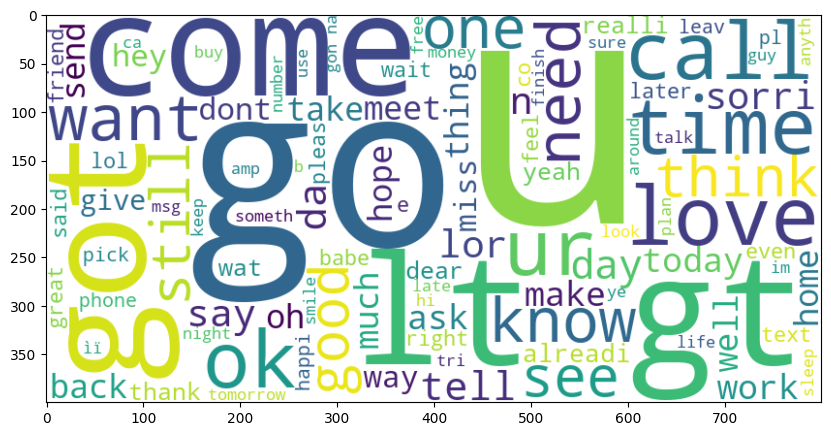

In [34]:
# plotting figure for spam_wc 

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(spam_wc, interpolation='bilinear')

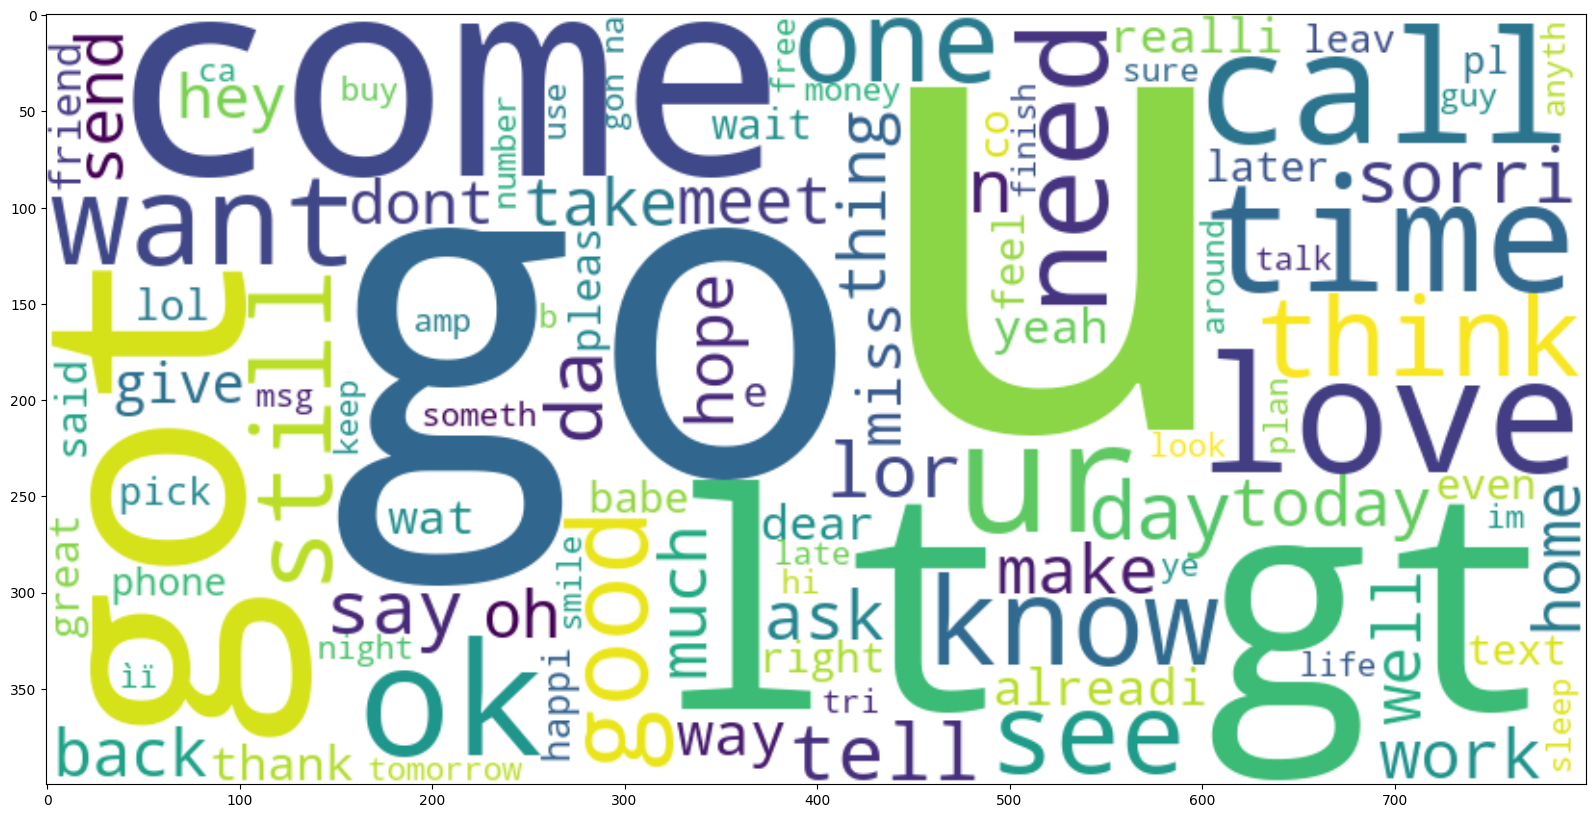

In [35]:
# plotting ham_wc figure

plt.figure(figsize=(20,10))

plt.imshow(ham_wc, interpolation='bilinear')

In [36]:
# Top 30 words in spam messages and ham messages

# 1. we need to combine all the words in spam messages and ham messages

spam_corpus = []
sms_messages = df[df['label'] == 1]['clean_text'].tolist()

for sms in sms_messages:
    for word in sms.split():
        spam_corpus.append(word)

ham_corpus = []
sms_messages = df[df['label'] == 0]['clean_text'].tolist()
for sms in sms_messages:
    for word in sms.split():
        ham_corpus.append(word)

print("Total number of words in spam messages: ", len(spam_corpus))
print("Total number of words in ham messages: ", len(ham_corpus))


Total number of words in spam messages:  9939
Total number of words in ham messages:  35404


In [37]:
# Using counter to calculate the number of words frequesncy in each message

# 1. In spam messages

from collections import Counter

spam_counts = Counter(spam_corpus)

ham_counts = Counter(ham_corpus)

print(spam_counts.most_common(20))

print(ham_counts.most_common(20))

[('call', 320), ('free', 191), ('2', 155), ('txt', 141), ('text', 122), ('u', 119), ('ur', 119), ('mobil', 114), ('stop', 104), ('repli', 103), ('claim', 98), ('4', 97), ('prize', 82), ('get', 74), ('new', 64), ('servic', 64), ('tone', 63), ('send', 60), ('urgent', 57), ('nokia', 57)]
[('u', 883), ('go', 404), ('get', 349), ('gt', 288), ('lt', 287), ('2', 284), ('come', 275), ('got', 236), ('know', 236), ('like', 234), ('call', 233), ('time', 219), ('ok', 217), ('love', 216), ('good', 213), ('want', 208), ('ur', 197), ('day', 190), ('need', 170), ('one', 165)]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good')])

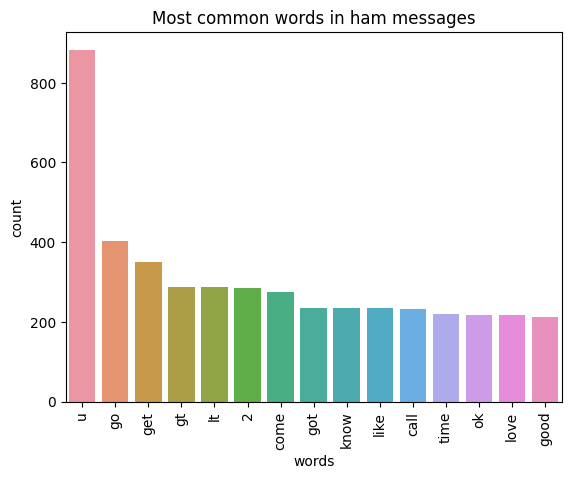

In [38]:
# Adding 15 most common them to data frame

spam_frame = pd.DataFrame(spam_counts.most_common(15), columns=['words', 'count'])
ham_frame = pd.DataFrame(ham_counts.most_common(15), columns=['words', 'count'])

# plot the data frames for both spam and ham

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y=spam_frame['count'], x=spam_frame['words']).set_title('Most common words in spam messages')

sns.barplot(y=ham_frame['count'], x=ham_frame['words']).set_title('Most common words in ham messages')

plt.xticks(rotation=90)

#### Model Building

In [39]:
# using Naive Bayes Classifier and tf-idf vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score

# selecting only 3000 most frequent words

vectorizer = TfidfVectorizer(max_features=3500)

# converting text to vectors

X = vectorizer.fit_transform(df['clean_text']).toarray()

# splitting data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,df['label'], test_size=0.2, random_state=0)

# training the model

model = MultinomialNB()

model.fit(X_train, y_train)

# checking accuracy

print("Accuracy: ", model.score(X_test, y_test))

# checking the precision 

print("Precision: ", precision_score(y_test, model.predict(X_test)))

Accuracy:  0.9642166344294004
Precision:  1.0


In [41]:

# dump model to binary file

import pickle

pickle.dump(model, open('model.pkl', 'wb'))

# dump tfidf X to binary file

pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# dump text_preprocess function to binary file

pickle.dump(text_preprocess, open('text_preprocess.pkl', 'wb'))